Este notebook utiliza el conjunto de datos CIFAR10 y aplica transformaciones a las imágenes para convertirlas en tensores y normalizar los valores de los canales RGB. Luego, muestra una muestra de imágenes y sus etiquetas correspondientes.

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

In [8]:
# Transformaciones de datos
transform = transforms.Compose(
    [transforms.ToTensor(),  # Convierte la imagen a tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normaliza los valores de los canales RGB


In [9]:
# Descarga y carga del conjunto de datos CIFAR10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [10]:
# Clases de la base de datos CIFAR10
classes = ('avión', 'automóvil', 'pájaro', 'gato',
           'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión')

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Mostrar imágenes de ejemplo
def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

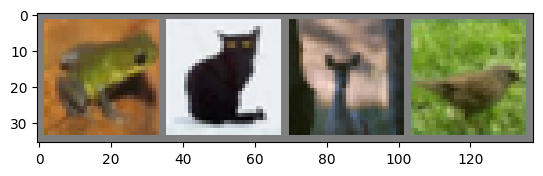

 rana  gato ciervo pájaro


In [12]:
# Iterar sobre los datos de entrenamiento
for images, labels in trainloader:

    # Mostrar imágenes y etiquetas
    imshow(torchvision.utils.make_grid(images))
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    break  # Detener después de mostrar un lote de imágenes

Ejercicio: Clasificación de imágenes con DataLoader

1. Descarga el conjunto de datos MNIST, que consiste en imágenes de dígitos escritos a mano.

2. Crea una clase personalizada llamada MiConjuntoDeDatosMNIST que herede de la clase torch.utils.data.Dataset. Esta clase debe cargar los datos MNIST y prepararlos para su uso. Implementa los métodos __len__ y __getitem__.

3. Utiliza la clase MiConjuntoDeDatosMNIST para crear una instancia de tu conjunto de datos.

4. Crea un dataloader utilizando la clase torch.utils.data.DataLoader y el conjunto de datos que creaste en el paso anterior. Asegúrate de especificar un tamaño de lote (batch_size) adecuado.

5. Itera sobre el dataloader y muestra algunas imágenes y sus etiquetas correspondientes. Puedes utilizar bibliotecas como matplotlib para visualizar las imágenes.

Pista: Puedes usar la biblioteca torchvision para cargar el conjunto de datos MNIST y convertir las imágenes en tensores.

Solucion

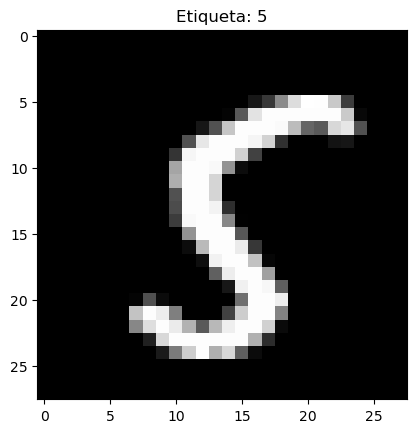

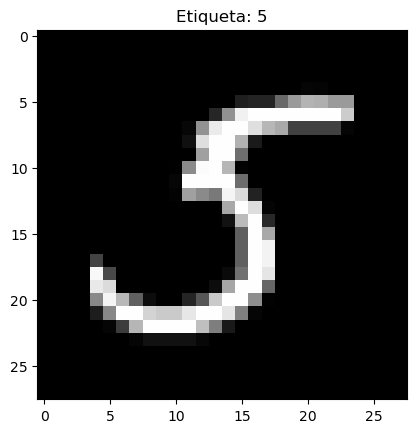

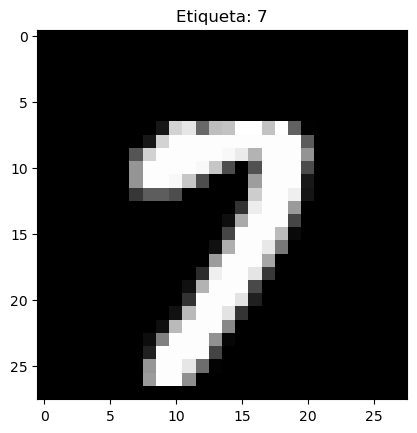

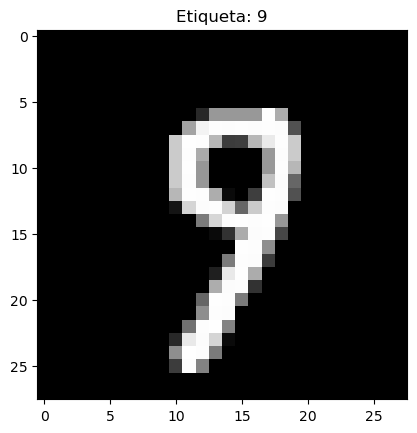

In [4]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Paso 1: Descargar el conjunto de datos MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Paso 2: Crear una clase personalizada para el conjunto de datos MNIST
class MiConjuntoDeDatosMNIST(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        return image, label

# Paso 3: Crear una instancia del conjunto de datos personalizado
mi_conjunto_de_datos = MiConjuntoDeDatosMNIST(train_dataset)

# Paso 4: Crear un dataloader para el conjunto de datos
batch_size = 4
dataloader = DataLoader(mi_conjunto_de_datos, batch_size=batch_size, shuffle=True)

# Paso 5: Iterar sobre el dataloader y mostrar imágenes y etiquetas correspondientes
data_iter = iter(dataloader)
images, labels = next(data_iter)

# Mostrar imágenes y etiquetas
for i in range(batch_size):
    image = images[i][0]  # Las imágenes están en el índice 0
    label = labels[i]
    plt.imshow(image, cmap='gray')
    plt.title(f'Etiqueta: {label}')
    plt.show()
